In [1]:
#Includes necesarios
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

from preprocessing import apply_OHE
from auxiliar import get_train_validation,get_holdout,create_prediction
from auxiliar import plot_cm, plot_roc_curve
from sklearn.metrics import classification_report

# Arbol de Desicion

Obtenemos los datos de entrenamiento y de validacion

In [2]:
X_train, X_validation, y_train, y_validation = get_train_validation(missings='category',feature_engineering=True)

Para entrenar el arbol necesitamos aplicar OHE en las columnas categoricas, para esto llamamos a la funcion de preprocesamiento **aplicar_OHE**:

In [3]:
X_train = apply_OHE(X_train)
X_validation = apply_OHE(X_validation)

Busco los mejores hiperparametros para el arbol de decision con randomsearch:

In [6]:
params = {
    'max_depth': np.arange(1, 10),
    'min_samples_leaf': np.arange(40, 70),
    "criterion": ["gini", "entropy"],
}

clf = DecisionTreeClassifier(random_state=19)

rgscv = RandomizedSearchCV(
    clf, params, n_iter=60, scoring='accuracy', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")
min_samples_leaf = rgscv.best_params_.get("min_samples_leaf")
max_depth = rgscv.best_params_.get("max_depth")
criterion = rgscv.best_params_.get("criterion")

Best score: 0.8543844645083126
Best params {'min_samples_leaf': 52, 'max_depth': 8, 'criterion': 'gini'}


Armo el modelo de arbol de decision con los hiperparametros calculados:

In [7]:
model_tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion=criterion,
                       max_depth=max_depth, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=min_samples_leaf, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=19, splitter='best')

Entreno el modelo con el train set:

In [8]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=52, random_state=19)

Predigo con el validation set:

In [9]:
tree_predict = model_tree.predict(X_validation)

## Metricas

In [10]:
print(classification_report(y_validation, tree_predict))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4945
           1       0.80      0.53      0.64      1568

    accuracy                           0.86      6513
   macro avg       0.83      0.74      0.77      6513
weighted avg       0.85      0.86      0.84      6513



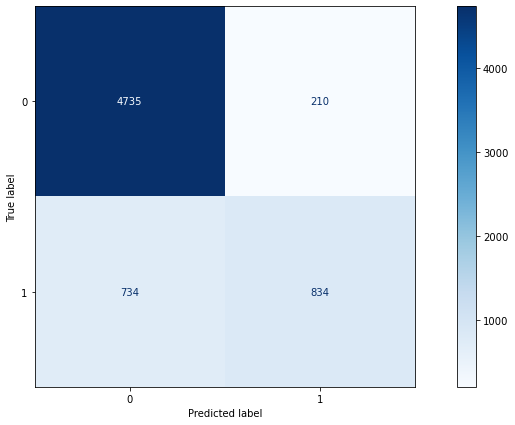

In [11]:
plot_cm(model_tree, X_validation, y_validation)

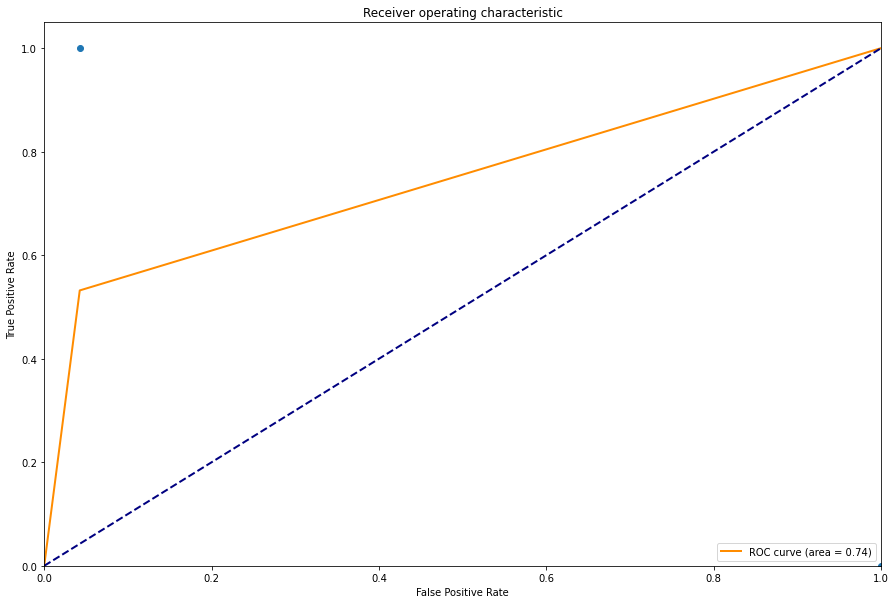

In [12]:
plot_roc_curve(y_validation,tree_predict)

## Prediccion

In [13]:
ids, X_holdout = get_holdout(missings='category',feature_engineering=True)

In [14]:
X_holdout = apply_OHE(X_holdout)

In [15]:
tree_predict = model_tree.predict(X_holdout)

In [18]:
create_prediction(ids,tree_predict,name='arbol_desicion')

       tiene_alto_valor_adquisitivo
0                                 0
1                                 0
2                                 0
3                                 1
4                                 0
...                             ...
16276                             0
16277                             0
16278                             1
16279                             0
16280                             1

[16281 rows x 1 columns]
